## Part II, Problem 4.

Let $n\geq 3$ be a positive integer. Prove that $U(2^n)$ is not cyclic.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from math import gcd
from matplotlib.ticker import MaxNLocator
from IPython.display import display, Math

**Definition.** Let $n$ be a positive integer. Define $U(n) = \{ a \in \{ 1, \ldots, n - 1 \} \,\vert\, \gcd(a, n) = 1 \}$ the multiplicative group of integers mod $n$.

In [2]:
def U(n):
    return [a for a in range(n) if gcd(a, n) == 1]

What does $U(2^n)$ look like?

In [3]:
for n in range(3, 8):
    display(Math(rf'U({2**n})')) # fancy latex headings

    print(U(2**n))
    print()

<IPython.core.display.Math object>

[1, 3, 5, 7]



<IPython.core.display.Math object>

[1, 3, 5, 7, 9, 11, 13, 15]



<IPython.core.display.Math object>

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]



<IPython.core.display.Math object>

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63]



<IPython.core.display.Math object>

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127]



<details>
    <summary>✨ Click for explanation.</summary>
    Since the only factors of $2^n$ are powers of $2$, a number will be relatively prime with $2^n$ if it does not have $2$ as a factor, i.e. if it is odd. Therefore $U(2^n)$ is the set of odd numbers between $1$ and $2^n - 1$.
</details>

## Orders of elements in $U(2^n)$

A function that computes the order of an element $a$ in $U(n)$ by computing powers of $a$ until we reach the identity:

In [4]:
def order(a, n):
    p = 1
    while (a**p % n) != 1:
        p += 1
    return p

In [5]:
for n in range(3, 10):
    display(Math(rf'\text{{$\lvert a \rvert$ for each $a \in U({2**n})$}}')) # fancy latex headings

    u = U(2**n)
    u_orders = [order(a, 2**n) for a in u]
    print(u_orders)
    print()

<IPython.core.display.Math object>

[1, 2, 2, 2]



<IPython.core.display.Math object>

[1, 4, 4, 2, 2, 4, 4, 2]



<IPython.core.display.Math object>

[1, 8, 8, 4, 4, 8, 8, 2, 2, 8, 8, 4, 4, 8, 8, 2]



<IPython.core.display.Math object>

[1, 16, 16, 8, 8, 16, 16, 4, 4, 16, 16, 8, 8, 16, 16, 2, 2, 16, 16, 8, 8, 16, 16, 4, 4, 16, 16, 8, 8, 16, 16, 2]



<IPython.core.display.Math object>

[1, 32, 32, 16, 16, 32, 32, 8, 8, 32, 32, 16, 16, 32, 32, 4, 4, 32, 32, 16, 16, 32, 32, 8, 8, 32, 32, 16, 16, 32, 32, 2, 2, 32, 32, 16, 16, 32, 32, 8, 8, 32, 32, 16, 16, 32, 32, 4, 4, 32, 32, 16, 16, 32, 32, 8, 8, 32, 32, 16, 16, 32, 32, 2]



<IPython.core.display.Math object>

[1, 64, 64, 32, 32, 64, 64, 16, 16, 64, 64, 32, 32, 64, 64, 8, 8, 64, 64, 32, 32, 64, 64, 16, 16, 64, 64, 32, 32, 64, 64, 4, 4, 64, 64, 32, 32, 64, 64, 16, 16, 64, 64, 32, 32, 64, 64, 8, 8, 64, 64, 32, 32, 64, 64, 16, 16, 64, 64, 32, 32, 64, 64, 2, 2, 64, 64, 32, 32, 64, 64, 16, 16, 64, 64, 32, 32, 64, 64, 8, 8, 64, 64, 32, 32, 64, 64, 16, 16, 64, 64, 32, 32, 64, 64, 4, 4, 64, 64, 32, 32, 64, 64, 16, 16, 64, 64, 32, 32, 64, 64, 8, 8, 64, 64, 32, 32, 64, 64, 16, 16, 64, 64, 32, 32, 64, 64, 2]



<IPython.core.display.Math object>

[1, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 16, 16, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 8, 8, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 16, 16, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 4, 4, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 16, 16, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 8, 8, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 16, 16, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 2, 2, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 16, 16, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 8, 8, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 16, 16, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 4, 4, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 16, 16, 128, 128, 64, 64, 128, 128, 32, 32, 128, 128, 64, 64, 128, 128, 8, 8, 12

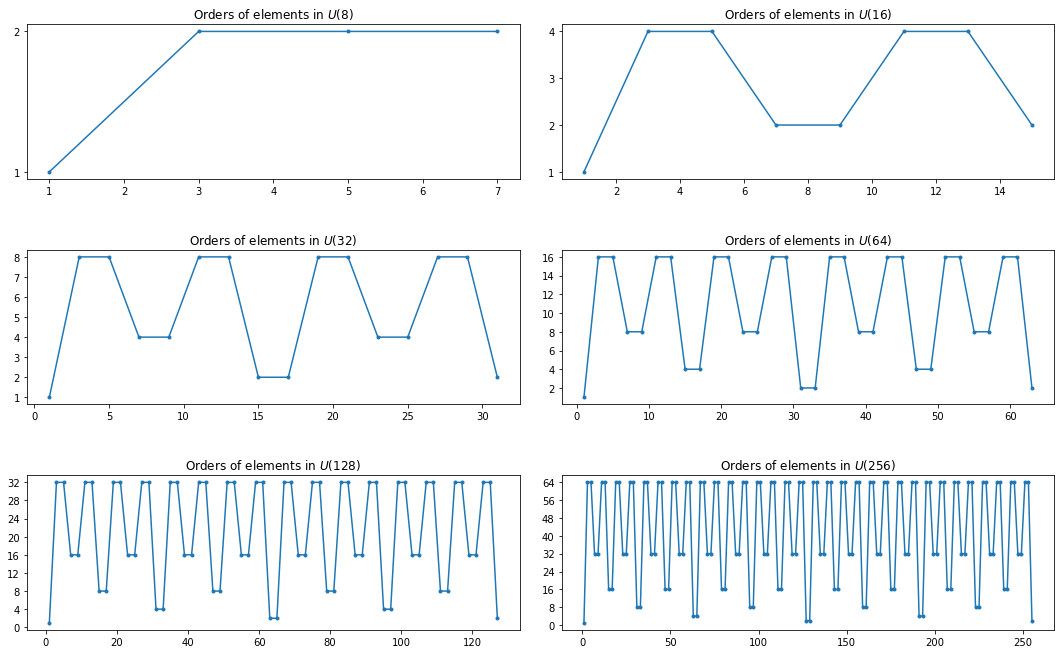

In [6]:
def plot_orders(exponents, num_rows):
    fig, axes = plt.subplots(num_rows, len(exponents) // num_rows, figsize=(15, 3 * num_rows))
    fig.tight_layout(h_pad=5)

    for n, ax in zip(exponents, axes.flatten()):
        ax.set_title(rf'Orders of elements in $U({2**n})$')
        ax.yaxis.set_major_locator(MaxNLocator(integer=True)) # force integer axis ticks

        u = U(2**n)
        u_orders = [order(a, 2**n) for a in u]
        ax.plot(u, u_orders, '.-')

plot_orders([3, 4, 5, 6, 7, 8], num_rows=3)

In [7]:
for n in range(3, 10):
    display(Math(rf'\text{{$(a, \lvert a \rvert)$ for each $a \in U({2**n})$}}')) # fancy latex headings

    print([(a, order(a, 2**n)) for a in U(2**n)])
    print()

<IPython.core.display.Math object>

[(1, 1), (3, 2), (5, 2), (7, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 4), (5, 4), (7, 2), (9, 2), (11, 4), (13, 4), (15, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 8), (5, 8), (7, 4), (9, 4), (11, 8), (13, 8), (15, 2), (17, 2), (19, 8), (21, 8), (23, 4), (25, 4), (27, 8), (29, 8), (31, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 16), (5, 16), (7, 8), (9, 8), (11, 16), (13, 16), (15, 4), (17, 4), (19, 16), (21, 16), (23, 8), (25, 8), (27, 16), (29, 16), (31, 2), (33, 2), (35, 16), (37, 16), (39, 8), (41, 8), (43, 16), (45, 16), (47, 4), (49, 4), (51, 16), (53, 16), (55, 8), (57, 8), (59, 16), (61, 16), (63, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 32), (5, 32), (7, 16), (9, 16), (11, 32), (13, 32), (15, 8), (17, 8), (19, 32), (21, 32), (23, 16), (25, 16), (27, 32), (29, 32), (31, 4), (33, 4), (35, 32), (37, 32), (39, 16), (41, 16), (43, 32), (45, 32), (47, 8), (49, 8), (51, 32), (53, 32), (55, 16), (57, 16), (59, 32), (61, 32), (63, 2), (65, 2), (67, 32), (69, 32), (71, 16), (73, 16), (75, 32), (77, 32), (79, 8), (81, 8), (83, 32), (85, 32), (87, 16), (89, 16), (91, 32), (93, 32), (95, 4), (97, 4), (99, 32), (101, 32), (103, 16), (105, 16), (107, 32), (109, 32), (111, 8), (113, 8), (115, 32), (117, 32), (119, 16), (121, 16), (123, 32), (125, 32), (127, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 64), (5, 64), (7, 32), (9, 32), (11, 64), (13, 64), (15, 16), (17, 16), (19, 64), (21, 64), (23, 32), (25, 32), (27, 64), (29, 64), (31, 8), (33, 8), (35, 64), (37, 64), (39, 32), (41, 32), (43, 64), (45, 64), (47, 16), (49, 16), (51, 64), (53, 64), (55, 32), (57, 32), (59, 64), (61, 64), (63, 4), (65, 4), (67, 64), (69, 64), (71, 32), (73, 32), (75, 64), (77, 64), (79, 16), (81, 16), (83, 64), (85, 64), (87, 32), (89, 32), (91, 64), (93, 64), (95, 8), (97, 8), (99, 64), (101, 64), (103, 32), (105, 32), (107, 64), (109, 64), (111, 16), (113, 16), (115, 64), (117, 64), (119, 32), (121, 32), (123, 64), (125, 64), (127, 2), (129, 2), (131, 64), (133, 64), (135, 32), (137, 32), (139, 64), (141, 64), (143, 16), (145, 16), (147, 64), (149, 64), (151, 32), (153, 32), (155, 64), (157, 64), (159, 8), (161, 8), (163, 64), (165, 64), (167, 32), (169, 32), (171, 64), (173, 64), (175, 16), (177, 16), (179, 64), (181, 64), (183, 32), (185, 32), (187, 64), (189, 64), (191, 4), (193, 4), 

<IPython.core.display.Math object>

[(1, 1), (3, 128), (5, 128), (7, 64), (9, 64), (11, 128), (13, 128), (15, 32), (17, 32), (19, 128), (21, 128), (23, 64), (25, 64), (27, 128), (29, 128), (31, 16), (33, 16), (35, 128), (37, 128), (39, 64), (41, 64), (43, 128), (45, 128), (47, 32), (49, 32), (51, 128), (53, 128), (55, 64), (57, 64), (59, 128), (61, 128), (63, 8), (65, 8), (67, 128), (69, 128), (71, 64), (73, 64), (75, 128), (77, 128), (79, 32), (81, 32), (83, 128), (85, 128), (87, 64), (89, 64), (91, 128), (93, 128), (95, 16), (97, 16), (99, 128), (101, 128), (103, 64), (105, 64), (107, 128), (109, 128), (111, 32), (113, 32), (115, 128), (117, 128), (119, 64), (121, 64), (123, 128), (125, 128), (127, 4), (129, 4), (131, 128), (133, 128), (135, 64), (137, 64), (139, 128), (141, 128), (143, 32), (145, 32), (147, 128), (149, 128), (151, 64), (153, 64), (155, 128), (157, 128), (159, 16), (161, 16), (163, 128), (165, 128), (167, 64), (169, 64), (171, 128), (173, 128), (175, 32), (177, 32), (179, 128), (181, 128), (183, 64), (

<details>
    <summary>✨ What are these elements?</summary>
We notice that the elements $2^{n-1}-1$ and $2^{n-1}+1$ always seem to have order two.
</details>

<details>
    <summary>✨ They are elements of $U(2^n)$</summary>
First consider $2^{n-1}-1$. It is odd, since $2^n$ is even, and it is between $1$ and $2^n$, so it is an element of $U(2^n)$.
    
Similarly, we can show that $2^{n-1}+1$ is an element of $U(2^n)$
</details>

<details>
    <summary>✨ They have order two</summary>
Because $n \geq 3$, we also know that $2^{n-1}-1 \neq 1$, so it does not have order one.

We show that it has order two:
\begin{align*}
    (2^{n-1} - 1)^2 &= 2^{2n-2} - 2^n + 1 &\text{(expand with FOIL)}\\
    &= 2^n (2^{n-2} - 1) + 1 &\text{(factor out $2^n$)}
\end{align*}

Since $n \geq 3$, we know that $n - 2 \geq 1$, therefore $(2^{n-2} - 1)$ is an integer. Then we can write $(2^{n-1}-1)^2 \bmod 2^n = 1$, so we have shown that it has order two.

    
We can show using the same process that $2^{n-1}+1$ also has order two.
</details>

<details>
    <summary>✨ They form subgroups of order two</summary>
Then $\{1,\, 2^{n-1}-1\}$ and $\{1,\, 2^{n-1}+1\}$ are subgroups of $U(2^n)$.
</details>

<details>
    <summary>✨ Conclusion</summary>
We have shown that for any $n$, there are at least two subgroups of $U(2^n)$ with order two, so the subgroup of order two is not unique. This violates the third claim of the fundamental theorem of cyclic groups, so $U(2^n)$ must not be cyclic.
</details>